In [1]:
from os import path, mkdir
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

SEED = 42

In [2]:
def make_perceptron_friendly_classification():
    x, y = make_classification(
        n_samples=100,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_clusters_per_class=1,
        flip_y=0.0,
        class_sep=1.0,
        scale=1,
        random_state=SEED
    )

    y = 2.0 * y - 1.0

    return x, y

In [3]:
def visualize_data(name, x, y, w=None):
    one_indices = np.where(y == 1)[0]
    minus_one_indices = np.where(y == -1)[0]

    one_dots = np.array(x)[one_indices]
    minus_one_dots = np.array(x)[minus_one_indices]

    fig, ax = plt.subplots()

    top = max([e[1] for e in x]) + 1
    right = max([e[0] for e in x]) + 1
    bottom = min([e[1] for e in x]) - 1
    left = min([e[0] for e in x]) - 1
    
    xx = np.arange(left, right, 0.01)
    
    blue_fill, orange_fill, line = None, None, None
    if w is not None:
        c, a, b = w

        def f(z):
            return - (a * z + c) / b

        yy = np.ravel([f(z) for z in xx])
        

        ax.fill_between(xx, y1=yy, y2=top, where=yy < top, color='blue', alpha=0.2)
        ax.fill_between(xx, y1=yy, y2=bottom, where=yy > bottom, color='orange', alpha=0.2)
        ax.plot(xx, yy, 'g')
    
    ax.scatter(one_dots[:, 0], one_dots[:, 1])
    ax.scatter(minus_one_dots[:, 0], minus_one_dots[:, 1])
    plt.title(name + ' dataset')
    plt.xlim((left, right))
    plt.ylim((bottom, top))
    plt.show()

In [4]:
def convert_weights(w):
    w = np.squeeze(w)
    b = w[-1]
    w = w[:-1]
    return np.hstack([b, w])

# Visualizing the data
By looking at the data points we can clearly notice that it is linearly seperable

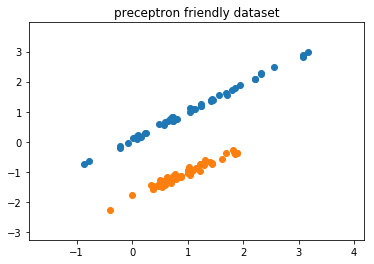

In [5]:
x, y = make_perceptron_friendly_classification()
visualize_data('preceptron friendly', x, y)

# The Perceptron
We will implement the Perceptron Algorithm for supervised learning of binary classifiers.

![](additional_imgs/perceptron_algo.png)

In [6]:
def concat_ones(x):
    n = np.ones((x.shape[0], 1))
    return np.hstack((x, n))

def predict(w, x):
    return np.sign(w.T @ x)

x = concat_ones(x)

In [7]:
def fit(lr, T):
    input_dim = 2
    classes = np.unique(y)
    w = np.random.uniform(-1, 1, (input_dim + 1, 1)) / np.square(input_dim) # adding 1 for the bias term
    weights_ = [w]

    for epoch in range(T):
        training_order = np.random.permutation(range(x.shape[0]))
        changed = False
        for i_sample in training_order:
            x_, y_true = x[i_sample].reshape(-1, 1), y[i_sample]
            y_pred = predict(w, x_)

            if y_pred != y_true:
                changed = True
                w += lr * y_true * x_

        weights_.append(w.copy())

        if not changed:
            break
            
    return weights_

        

In [8]:
weights = fit(lr=1e-3, T=200)

![ChessUrl](additional_imgs/convergence.gif)